Analysis on a3_a4 combined data, a3_data and a4 data

In [72]:
%load_ext autoreload
%autoreload 2
from correlation_analysis_helper import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Read Data (combined a3-a4 data)

In [ ]:
folder_path = "EDAModelDatasets/a3_a4_combined"
X = pd.read_csv(f"{folder_path}/X.csv", index_col=0)
y = pd.read_csv(f"{folder_path}/y.csv", index_col=0)
print(X.isna().sum().sum(), y.isna().sum().sum())

0 0


In [74]:
X.columns

Index(['number_of_scr_onsets', 'number_of_scr_peaks',
       'number_of_scr_recoveries', 'mean_scr_height', 'mean_scr_amplitude',
       'mean_scr_rise_time', 'mean_scr_recovery_time', 'mixed_min_feat',
       'mixed_max_feat', 'mixed_mean_feat', 'mixed_std_feat',
       'mixed_dynamic_range_feat', 'mixed_slope_feat',
       'mixed_absolute_slope_feat', 'mixed_first_derivetive_mean_feat',
       'mixed_first_derivative_std_feat', 'mixed_dc_term',
       'mixed_sum_of_all_coefficients', 'mixed_information_entropy',
       'mixed_spectral_energy', 'tonic_min_feat', 'tonic_max_feat',
       'tonic_mean_feat', 'tonic_std_feat', 'tonic_dynamic_range_feat',
       'tonic_slope_feat', 'tonic_absolute_slope_feat',
       'tonic_first_derivetive_mean_feat', 'tonic_first_derivative_std_feat',
       'tonic_dc_term', 'tonic_sum_of_all_coefficients',
       'tonic_information_entropy', 'tonic_spectral_energy', 'phasic_min_feat',
       'phasic_max_feat', 'phasic_mean_feat', 'phasic_std_feat',
    

Read a3 and a4 separately

In [ ]:
folder_path_a3 = "EDAModelDatasets/a3"
X_a3 = pd.read_csv(f"{folder_path_a3}/X.csv", index_col=0)
y_a3 = pd.read_csv(f"{folder_path_a3}/y.csv", index_col=0)
print(X_a3.isna().sum().sum(), y_a3.isna().sum().sum())
folder_path_a4 = "EDAModelDatasets/a4"
X_a4 = pd.read_csv(f"{folder_path_a4}/X.csv", index_col=0)
y_a4 = pd.read_csv(f"{folder_path_a4}/y.csv", index_col=0)
print(X_a4.isna().sum().sum(), y_a4.isna().sum().sum())

0 0
0 0


Read each subject individually

In [76]:
X_list, y_list = load_each_subject_individually()

In [77]:
print(X.shape, y.shape)
print(X_a3.shape, y_a3.shape)
print(X_a4.shape, y_a4.shape)

(62691, 46) (62691, 1)
(36820, 46) (36820, 1)
(25871, 46) (25871, 1)


# Steps

Write functions to:
- Do different types of correlation analysis and clustering on given datasets
- Determine redundant/highly correlated features
- Project data to a different embedding domain
- Do PCM/SVD


Class distribution : roughly 15% are labeled as activity in each dataset

In [78]:
print(y.value_counts(normalize=True))
print(y_a3.value_counts(normalize=True))
print(y_a4.value_counts(normalize=True))

activity
0           0.846198
1           0.153802
Name: proportion, dtype: float64
activity
0           0.839326
1           0.160674
Name: proportion, dtype: float64
activity
0           0.855978
1           0.144022
Name: proportion, dtype: float64


Plot distribution of labels across participants

Plot class ratios

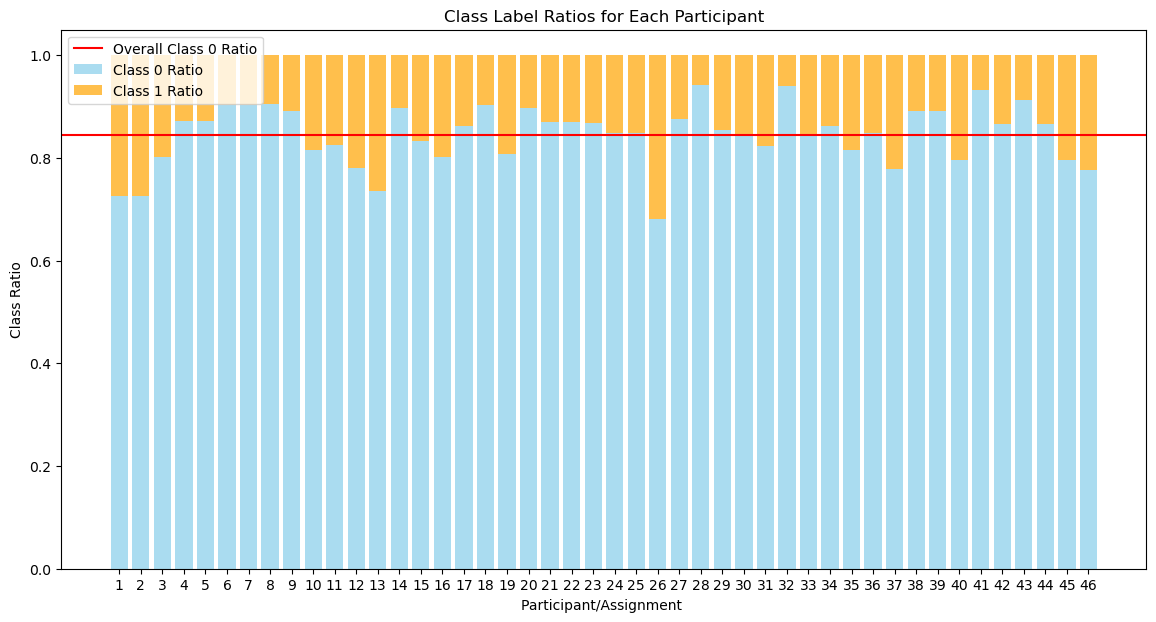

,0,1
count,46.000000,46.000000
mean,0.846118,0.153882
std,0.058792,0.058792
min,0.682028,0.058147
25%,0.810226,0.108559
50%,0.858297,0.141703
75%,0.891441,0.189774
max,0.941853,0.317972


In [79]:
y_participant_ratios = [y.value_counts(normalize=True).values for y in y_list]

ratios_0 = [ratios[0] for ratios in y_participant_ratios]
ratios_1 = [ratios[1] for ratios in y_participant_ratios]
participants = range(1, len(y_participant_ratios) + 1)

plt.figure(figsize=(14, 7))
bar_width = 0.5

plt.bar(participants, ratios_0, label='Class 0 Ratio', color='skyblue', alpha=0.7)
plt.bar(participants, ratios_1, bottom=ratios_0, label='Class 1 Ratio', color='orange', alpha=0.7)
plt.xlabel('Participant/Assignment ')
plt.ylabel('Class Ratio')
# horizontal line
plt.axhline(0.845, color='red', label='Overall Class 0 Ratio')
plt.title('Class Label Ratios for Each Participant')
plt.xticks(participants)
plt.legend()

plt.show()

y_ratios_df = pd.DataFrame(y_participant_ratios)
y_ratios_df.describe()

# Correlation between features

Pearson

In [80]:
threshold = 0.9
def get_high_corr_pairs(X,method='pearson',threshold=0.8):
    corr_matrix = X.corr(method=method)
    mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    upper_triangle = corr_matrix.where(mask)
    # Now, filter for correlations above 0.8 or below -0.8
    high_corr_pairs = upper_triangle.stack().reset_index()
    high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
    high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'] > threshold) | (high_corr_pairs['Correlation'] < -threshold)]
    high_corr_pairs.sort_values(by='Correlation', key=lambda x: x.abs(), ascending=False,inplace=True)
    # high_corr_pairs.sort_values(by='Correlation', ascending=False, inplace=True)
    return high_corr_pairs

high_corr_pairs = get_high_corr_pairs(X, 'pearson',threshold)
high_corr_pairs_a3 = get_high_corr_pairs(X_a3, 'pearson',threshold)
high_corr_pairs_a4 = get_high_corr_pairs(X_a4, 'pearson',threshold)

In [81]:
high_corr_pairs

,Feature1,Feature2,Correlation
600,mixed_dc_term,mixed_sum_of_all_coefficients,1.000000
378,mixed_mean_feat,mixed_spectral_energy,1.000000
899,tonic_dc_term,tonic_sum_of_all_coefficients,1.000000
1029,phasic_dc_term,phasic_sum_of_all_coefficients,1.000000
768,tonic_mean_feat,tonic_spectral_energy,0.999996
...,...,...,...
564,mixed_first_derivetive_mean_feat,phasic_first_derivetive_mean_feat,0.934589
590,mixed_first_derivative_std_feat,phasic_std_feat,0.925928
994,phasic_std_feat,phasic_first_derivative_std_feat,0.925688
409,mixed_std_feat,mixed_first_derivative_std_feat,0.914421


In [82]:
high_corr_pairs_a3

,Feature1,Feature2,Correlation
1029,phasic_dc_term,phasic_sum_of_all_coefficients,1.000000
378,mixed_mean_feat,mixed_spectral_energy,1.000000
899,tonic_dc_term,tonic_sum_of_all_coefficients,1.000000
600,mixed_dc_term,mixed_sum_of_all_coefficients,1.000000
768,tonic_mean_feat,tonic_spectral_energy,0.999994
...,...,...,...
409,mixed_std_feat,mixed_first_derivative_std_feat,0.924518
435,mixed_std_feat,phasic_first_derivative_std_feat,0.924193
340,mixed_max_feat,mixed_sum_of_all_coefficients,0.914422
339,mixed_max_feat,mixed_dc_term,0.914422


In [83]:
high_corr_pairs_a4

,Feature1,Feature2,Correlation
600,mixed_dc_term,mixed_sum_of_all_coefficients,1.000000
378,mixed_mean_feat,mixed_spectral_energy,1.000000
899,tonic_dc_term,tonic_sum_of_all_coefficients,1.000000
768,tonic_mean_feat,tonic_spectral_energy,1.000000
1029,phasic_dc_term,phasic_sum_of_all_coefficients,1.000000
...,...,...,...
443,mixed_dynamic_range_feat,mixed_first_derivative_std_feat,0.923399
469,mixed_dynamic_range_feat,phasic_first_derivative_std_feat,0.922744
590,mixed_first_derivative_std_feat,phasic_std_feat,0.912743
994,phasic_std_feat,phasic_first_derivative_std_feat,0.912276


Spearman

In [84]:
threshold = 0.7
high_corr_pairs_sp = get_high_corr_pairs(X, 'spearman',threshold)
high_corr_pairs_sp_a3 = get_high_corr_pairs(X_a3, 'spearman',threshold)
high_corr_pairs_sp_a4 = get_high_corr_pairs(X_a4, 'spearman',threshold)

In [85]:
high_corr_pairs_sp

,Feature1,Feature2,Correlation
1029,phasic_dc_term,phasic_sum_of_all_coefficients,1.000000
378,mixed_mean_feat,mixed_spectral_energy,1.000000
600,mixed_dc_term,mixed_sum_of_all_coefficients,1.000000
899,tonic_dc_term,tonic_sum_of_all_coefficients,1.000000
768,tonic_mean_feat,tonic_spectral_energy,1.000000
...,...,...,...
90,number_of_scr_recoveries,mean_scr_amplitude,0.706702
91,number_of_scr_recoveries,mean_scr_rise_time,0.706112
675,mixed_information_entropy,phasic_dynamic_range_feat,-0.704127
959,phasic_min_feat,phasic_std_feat,-0.703119


In [86]:
high_corr_pairs_sp_a3

,Feature1,Feature2,Correlation
1029,phasic_dc_term,phasic_sum_of_all_coefficients,1.000000
378,mixed_mean_feat,mixed_spectral_energy,1.000000
600,mixed_dc_term,mixed_sum_of_all_coefficients,1.000000
899,tonic_dc_term,tonic_sum_of_all_coefficients,1.000000
768,tonic_mean_feat,tonic_spectral_energy,1.000000
...,...,...,...
529,mixed_absolute_slope_feat,phasic_std_feat,0.718503
428,mixed_std_feat,phasic_max_feat,0.709569
427,mixed_std_feat,phasic_min_feat,-0.709370
1000,phasic_dynamic_range_feat,phasic_absolute_slope_feat,0.708732


In [87]:
high_corr_pairs_sp_a4

,Feature1,Feature2,Correlation
1029,phasic_dc_term,phasic_sum_of_all_coefficients,1.000000
899,tonic_dc_term,tonic_sum_of_all_coefficients,1.000000
600,mixed_dc_term,mixed_sum_of_all_coefficients,1.000000
768,tonic_mean_feat,tonic_spectral_energy,1.000000
378,mixed_mean_feat,mixed_spectral_energy,1.000000
...,...,...,...
412,mixed_std_feat,mixed_information_entropy,-0.734811
674,mixed_information_entropy,phasic_std_feat,-0.715962
407,mixed_std_feat,mixed_absolute_slope_feat,0.711122
960,phasic_min_feat,phasic_dynamic_range_feat,-0.709038


Correlation between label and features
- no feature by itself correlates significantly

In [88]:
X_y = pd.concat([X, y], axis=1)
X_y_a3 = pd.concat([X_a3, y_a3], axis=1)
X_y_a4 = pd.concat([X_a4, y_a4], axis=1)
corr_matrix = X_y.corr(method='pearson')
corr_matrix_a3 = X_y_a3.corr(method='pearson')
corr_matrix_a4 = X_y_a4.corr(method='pearson')

In [89]:
corr_matrix[['activity']].sort_values(by='activity', key = lambda x: x.abs(), ascending=False).head(10)

,activity
activity,1.000000
tonic_first_derivetive_mean_feat,0.037429
tonic_slope_feat,0.037266
mixed_max_feat,0.034397
tonic_max_feat,0.031261
tonic_spectral_energy,0.031070
tonic_mean_feat,0.031060
tonic_min_feat,0.030740
mixed_mean_feat,0.030635
mixed_spectral_energy,0.030635


In [90]:
corr_matrix_a3[['activity']].sort_values(by='activity', key = lambda x: x.abs(), ascending=False).head(10)

,activity
activity,1.000000
mixed_max_feat,0.061959
tonic_max_feat,0.056784
tonic_spectral_energy,0.056211
tonic_mean_feat,0.056194
mixed_mean_feat,0.055797
mixed_spectral_energy,0.055797
tonic_min_feat,0.055501
tonic_dc_term,0.054879
tonic_sum_of_all_coefficients,0.054879


In [91]:
corr_matrix_a4[['activity']].sort_values(by='activity', key = lambda x: x.abs(), ascending=False).head(10)

,activity
activity,1.000000
tonic_first_derivetive_mean_feat,0.044276
tonic_slope_feat,0.044110
mixed_slope_feat,0.022192
phasic_information_entropy,-0.017412
mean_scr_amplitude,-0.015335
mixed_first_derivetive_mean_feat,0.015140
mean_scr_height,-0.012342
tonic_absolute_slope_feat,-0.012222
mixed_min_feat,-0.011839


##### Conclusion: A lot of features are highly correlated, remove these pairs. No feature stands out as being particularly correlated to the label

# Prune variables
- Create versions of the datasets with the extra correlated variables pruned

Drop features based on pearson correlation being abvoe our threshold

In [92]:
features_to_drop = set()
for _, row in high_corr_pairs.iterrows():
    feature1 = row['Feature1']
    feature2 = row['Feature2']

    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)
print(features_to_drop, len(features_to_drop))

{'tonic_absolute_slope_feat', 'phasic_sum_of_all_coefficients', 'phasic_first_derivetive_mean_feat', 'tonic_max_feat', 'phasic_first_derivative_std_feat', 'phasic_std_feat', 'mixed_sum_of_all_coefficients', 'phasic_slope_feat', 'tonic_spectral_energy', 'mixed_dynamic_range_feat', 'tonic_first_derivetive_mean_feat', 'tonic_dc_term', 'tonic_sum_of_all_coefficients', 'tonic_min_feat', 'phasic_dynamic_range_feat', 'mixed_first_derivative_std_feat', 'phasic_absolute_slope_feat', 'mixed_mean_feat', 'tonic_dynamic_range_feat', 'mixed_spectral_energy', 'mixed_dc_term', 'tonic_mean_feat'} 22


In [93]:
X_pruned = X.drop(columns=features_to_drop)
X_a3_pruned = X_a3.drop(columns=features_to_drop)
X_a4_pruned = X_a4.drop(columns=features_to_drop)
X_list_pruned = [df.drop(columns=features_to_drop) for df in X_list]

In [94]:
# store this somewhere
# features_to_drop

In [95]:
features_to_drop = {'mixed_dc_term',
 'mixed_dynamic_range_feat',
 'mixed_first_derivative_std_feat',
 'mixed_mean_feat',
 'mixed_spectral_energy',
 'mixed_sum_of_all_coefficients',
 'phasic_absolute_slope_feat',
 'phasic_dynamic_range_feat',
 'phasic_first_derivative_std_feat',
 'phasic_first_derivetive_mean_feat',
 'phasic_slope_feat',
 'phasic_std_feat',
 'phasic_sum_of_all_coefficients',
 'tonic_absolute_slope_feat',
 'tonic_dc_term',
 'tonic_dynamic_range_feat',
 'tonic_first_derivetive_mean_feat',
 'tonic_max_feat',
 'tonic_mean_feat',
 'tonic_min_feat',
 'tonic_spectral_energy',
 'tonic_sum_of_all_coefficients'}

In [96]:
X_pruned.to_csv(f"{folder_path}/X_pruned.csv")
X_a3_pruned.to_csv(f"{folder_path_a3}/X_pruned.csv")
X_a4_pruned.to_csv(f"{folder_path_a4}/X_pruned.csv")

In [97]:
print(X_pruned.shape, X_a3_pruned.shape, X_a4_pruned.shape, X_list_pruned[0].shape)

(62691, 24) (36820, 24) (25871, 24) (1366, 24)


# Statistical Difference tests

Divide into productive - unproductive windows

In [98]:
X_zipped = {'a3_a4': (X[y['activity'] == 1],  X[y['activity'] == 0]),
            'a3': ( X_a3[y_a3['activity'] == 1], X_a3[y_a3['activity'] == 0]), 
            'a4': ( X_a4[y_a4['activity'] == 1], X_a4[y_a4['activity'] == 0]),
            'a3_a4_pruned': (X_pruned[y['activity'] == 1], X_pruned[y['activity'] == 0]),   
            'a3_pruned': (X_a3_pruned[y_a3['activity'] == 1], X_a3_pruned[y_a3['activity'] == 0]),
            'a4_pruned': (X_a4_pruned[y_a4['activity'] == 1], X_a4_pruned[y_a4['activity'] == 0])}

Check normality 

If the Shapito and KS Tests return a p value >0.05, we fail to reject the hypothesis that the distribution is normal
- Data is definitely not normal

In [99]:
threshold = 0.05
for key, (X_pos, X_neg) in X_zipped.items():
    print(f"\n{key}")
    X_combined = pd.concat([X_pos, X_neg])
    normality_df = check_normality(X_combined)
    shapiro_p = normality_df[normality_df['Shapiro-Wilk p-value'] > threshold]
    ks_p = normality_df[normality_df['KS Test p-value'] > threshold]
    if shapiro_p.shape[0] > 0:
        print("Shapiro-Wilk p-value > 0.05")
        print(shapiro_p)
    if ks_p.shape[0] > 0:
        print("KS Test p-value > 0.05")
        print(ks_p)


a3_a4


/Users/feyzjan/GithubRepos/EDA_Productivity/correlation_analysis_helper.py:68: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 62691.
  stat_sw, p_value_sw = shapiro(X[feature])



a3


/Users/feyzjan/GithubRepos/EDA_Productivity/correlation_analysis_helper.py:68: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 36820.
  stat_sw, p_value_sw = shapiro(X[feature])



a4


/Users/feyzjan/GithubRepos/EDA_Productivity/correlation_analysis_helper.py:68: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 25871.
  stat_sw, p_value_sw = shapiro(X[feature])



a3_a4_pruned


/Users/feyzjan/GithubRepos/EDA_Productivity/correlation_analysis_helper.py:68: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 62691.
  stat_sw, p_value_sw = shapiro(X[feature])



a3_pruned

a4_pruned


/Users/feyzjan/GithubRepos/EDA_Productivity/correlation_analysis_helper.py:68: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 36820.
  stat_sw, p_value_sw = shapiro(X[feature])
/Users/feyzjan/GithubRepos/EDA_Productivity/correlation_analysis_helper.py:68: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 25871.
  stat_sw, p_value_sw = shapiro(X[feature])


QQ Plot and Dist plot

In [100]:
# cols = X.columns
# for col in cols:
#     stats.probplot(X[col], dist="norm", plot=pylab)
#     # pot distribution
#     pylab.show()
#     X[col].hist()
#     plt.show()

Check if variances are equal

In [101]:
for key, value in X_zipped.items():
    print(f"\n----{key}---")
    cols = value[0].columns
    for col in cols:
        var_1 = np.var(value[0][col])
        var_2 = np.var(value[1][col])
        print(f"{col}, var_1:{round(var_1,3)}, var_2:{round(var_2,3)}" )


----a3_a4---
number_of_scr_onsets, var_1:0.963, var_2:1.007
number_of_scr_peaks, var_1:0.969, var_2:1.006
number_of_scr_recoveries, var_1:0.946, var_2:1.01
mean_scr_height, var_1:0.663, var_2:1.061
mean_scr_amplitude, var_1:0.71, var_2:1.053
mean_scr_rise_time, var_1:0.877, var_2:1.022
mean_scr_recovery_time, var_1:0.849, var_2:1.027
mixed_min_feat, var_1:0.931, var_2:1.012
mixed_max_feat, var_1:0.871, var_2:1.022
mixed_mean_feat, var_1:0.914, var_2:1.015
mixed_std_feat, var_1:0.721, var_2:1.051
mixed_dynamic_range_feat, var_1:0.733, var_2:1.048
mixed_slope_feat, var_1:0.731, var_2:1.049
mixed_absolute_slope_feat, var_1:0.684, var_2:1.057
mixed_first_derivetive_mean_feat, var_1:0.773, var_2:1.041
mixed_first_derivative_std_feat, var_1:0.811, var_2:1.034
mixed_dc_term, var_1:0.934, var_2:1.011
mixed_sum_of_all_coefficients, var_1:0.934, var_2:1.011
mixed_information_entropy, var_1:0.653, var_2:1.063
mixed_spectral_energy, var_1:0.914, var_2:1.015
tonic_min_feat, var_1:0.93, var_2:1.012

Conduct tests

T-test : Welch's t tests since variances are unequal
- unreliable since data is not normal

In [102]:
from scipy.stats import ttest_ind

for key, value in X_zipped.items():
    print(f"\n---- {key} ----")
    counter = 0
    
    cols = value[0].columns
    for col in cols:
        stat, p = ttest_ind(value[0][col], value[1][col], equal_var=False)
        if p > 0.05:
            counter += 1
            # print(f"{col}, stat:{round(stat)}, p:{round(p,3)}" )

    print(f"{counter} out of {len(cols)} values failed to reject the null hypothesis.")


---- a3_a4 ----
19 out of 46 values failed to reject the null hypothesis.

---- a3 ----
18 out of 46 values failed to reject the null hypothesis.

---- a4 ----
36 out of 46 values failed to reject the null hypothesis.

---- a3_a4_pruned ----
14 out of 24 values failed to reject the null hypothesis.

---- a3_pruned ----
13 out of 24 values failed to reject the null hypothesis.

---- a4_pruned ----
17 out of 24 values failed to reject the null hypothesis.


Anova
- tests if means are different, but used when we have more than 2 categories, not useful for us

In [103]:
from scipy.stats import f_oneway
for key, value in X_zipped.items():
    print(f"\n----{key}---")
    counter = 0
    cols = value[0].columns
    for col in cols:
        stat, p = f_oneway(value[0][col], value[1][col])
        if p > 0.05:
            counter += 1
            # print(f"{col}, stat:{round(stat)}, p:{round(p,3)}" )
    print(counter, " values failed to reject null hypothesis out of  ", len(cols))


----a3_a4---
21  values failed to reject null hypothesis out of   46

----a3---
18  values failed to reject null hypothesis out of   46

----a4---
38  values failed to reject null hypothesis out of   46

----a3_a4_pruned---
14  values failed to reject null hypothesis out of   24

----a3_pruned---
13  values failed to reject null hypothesis out of   24

----a4_pruned---
18  values failed to reject null hypothesis out of   24


#### Man Whitney U test **
- Tests the null hypothesis that the mean of distribution A is different from the mean of distribution B https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test
- Couple features seem to be identically distributed

In [104]:
for key, value in X_zipped.items():
    print(f"\n----{key}---")
    counter = 0
    cols = value[0].columns
    for col in cols:
        stat, p = scipy.stats.mannwhitneyu(value[0][col], value[1][col])
        if p > 0.05:
            counter += 1
            # print(f"{col}, stat:{round(stat)}, p:{round(p,3)}" )

    print(f"{counter} out of {len(cols)} values failed to reject the null hypothesis.")


----a3_a4---
5 out of 46 values failed to reject the null hypothesis.

----a3---
5 out of 46 values failed to reject the null hypothesis.

----a4---
21 out of 46 values failed to reject the null hypothesis.

----a3_a4_pruned---
4 out of 24 values failed to reject the null hypothesis.

----a3_pruned---
3 out of 24 values failed to reject the null hypothesis.

----a4_pruned---
9 out of 24 values failed to reject the null hypothesis.


# PCA

- Determine an optimal component number for PCA : 13 (95%var) or 9(90% var) seems alright
- fit these on the unpruned data

In [105]:
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(X)
pca_a3 = PCA() 
pca_a3.fit(X_a3)
pca_a4 = PCA()
pca_a4.fit(X_a4)

pcas = {'a3_a4':pca, 
        'a3': pca_a3, 
        'a4':pca_a4}

In [106]:
X_list_pca = []
for df in X_list:
    pca = PCA()
    pca.fit(df)
    X_list_pca.append(pca)

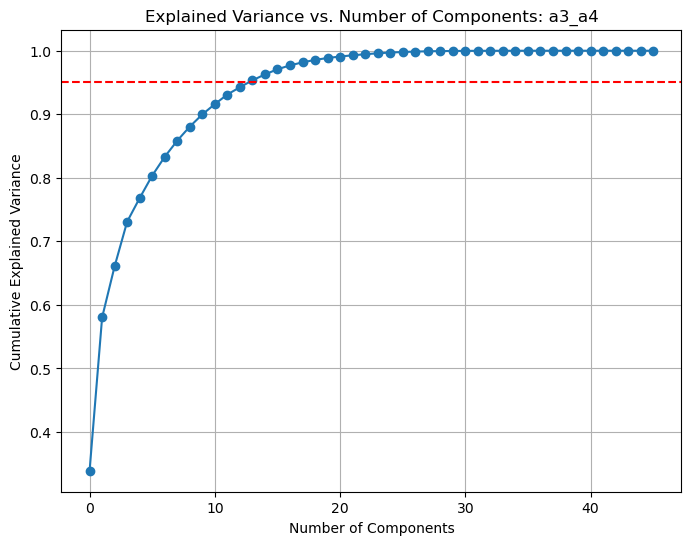

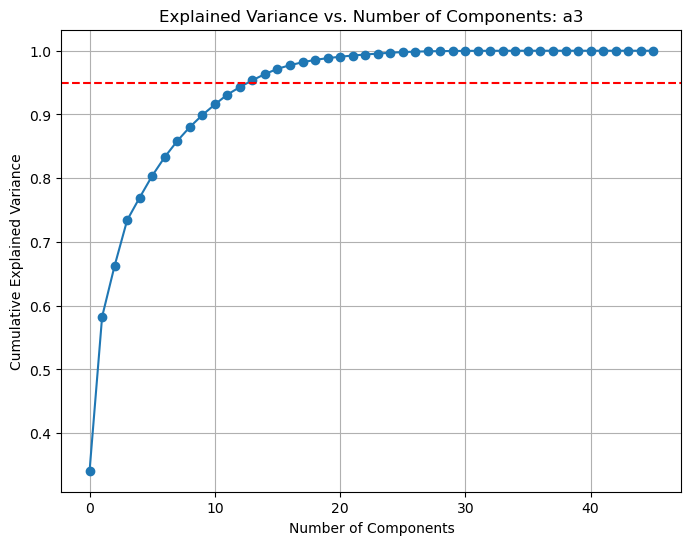

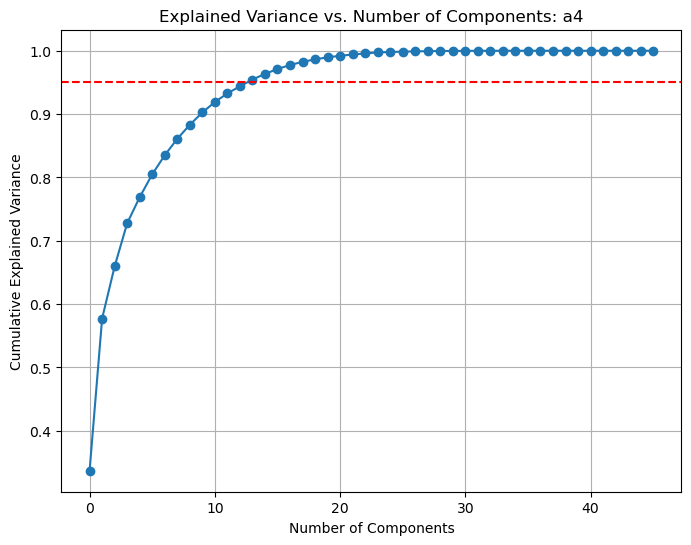

In [107]:
for name, pca in pcas.items():
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

    plt.figure(figsize=(8,6))
    plt.plot(cumulative_variance, marker='o')
    # plot horizontal line at 0.95
    plt.axhline(y=0.95, color='r', linestyle='--')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title(f'Explained Variance vs. Number of Components: {name}')
    plt.grid(True)
    plt.show()

Scree plot
- Explained variance by each additional element

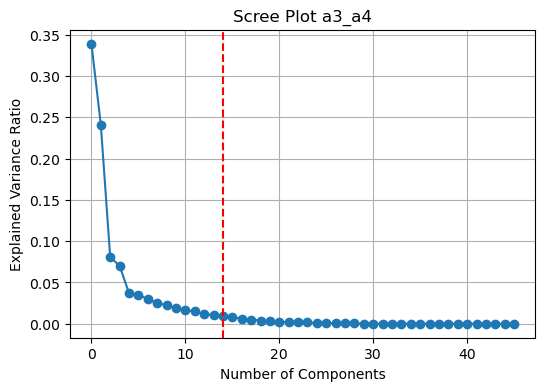

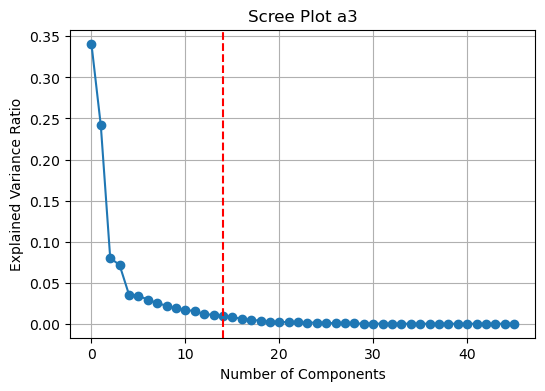

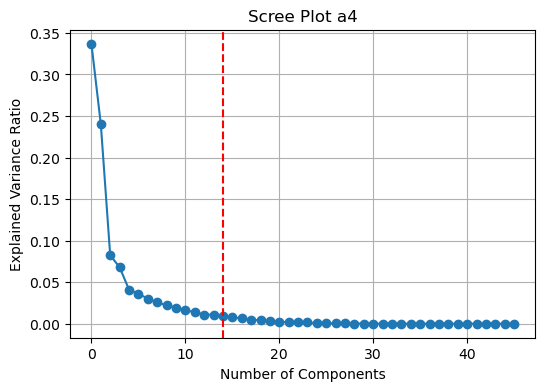

In [108]:
for name, pca in pcas.items():
    plt.figure(figsize=(6,4))
    plt.plot(pca.explained_variance_ratio_, marker='o')
    plt.axvline(x=14, color='r', linestyle='--')
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title(f'Scree Plot {name}')
    plt.grid(True)
    plt.show()

Get optimal pca

In [109]:
n_components = 13
X_pca = pca.transform(X)[:,:n_components]
X_a3_pca = pca_a3.transform(X_a3)[:,:n_components]
X_a4_pca = pca_a4.transform(X_a4)[:,:n_components]

Also pca each subject, using original pca

In [110]:
X_list_pca = []
for df in X_list:
    df_pca = pca.transform(df)[:,:n_components]
    X_list_pca.append(df_pca)

Save pca

In [111]:
pd.DataFrame(X_pca).to_csv(f"{folder_path}/X_pca.csv")
pd.DataFrame(X_a4_pca).to_csv(f"{folder_path_a4}/X_pca.csv")
pd.DataFrame(X_a3_pca).to_csv(f"{folder_path_a3}/X_pca.csv")

In [112]:
joblib.dump(pca, 'pca_a3_a4_model.joblib')

['pca_a3_a4_model.joblib']

Can check contibution of each feature to each pca

In [113]:
# # Each row corresponds to a principal component, and each column corresponds to a feature
# loadings = pca.components_[:n_components, :] 
# features = X.columns  # Assuming X is a DataFrame with column names
# loadings_df = pd.DataFrame(loadings.T, index=features, columns=[f'PC{i}' for i in range(1, n_components+1)])

# loadings_df.head()

In [114]:
X_pca[:, 0]

array([ 3.48708248, 12.43636111,  6.34117106, ..., -1.27309671,
        0.89775505,  3.23126601])

TODO: Visualize first two components and see if the results make sense

In [115]:

# plt.figure(figsize=(8, 6))
# scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis', alpha=0.7)
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA Projection (First Two Components)')
# plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1'])
# plt.show()

Save these

In [116]:
X_pca.shape, X_a3_pca.shape, X_a4_pca.shape # check shapes are ok

((62691, 13), (36820, 13), (25871, 13))

In [117]:
pd.DataFrame(X_pca).to_csv(f"{folder_path}/X_pca.csv")
joblib.dump(pca, f"{folder_path}/pca.pkl")
pd.DataFrame(X_a3_pca).to_csv(f"{folder_path_a3}/X_pca.csv")
joblib.dump(pca_a3, f"{folder_path_a3}/pca.pkl")
pd.DataFrame(X_a4_pca).to_csv(f"{folder_path_a4}/X_pca.csv")
joblib.dump(pca_a4, f"{folder_path_a4}/pca.pkl")

# can read as follows: pca = joblib.load('pca.pkl')

['ModelDatasets/a4/pca.pkl']

# Clustering

- Cluster the raw data

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Evaluate clustering performance
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.71


Clustering on PCA results

KNN

In [ ]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Evaluate clustering performance
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.71


Visualize clusters
- TODO: Also color for actual labels

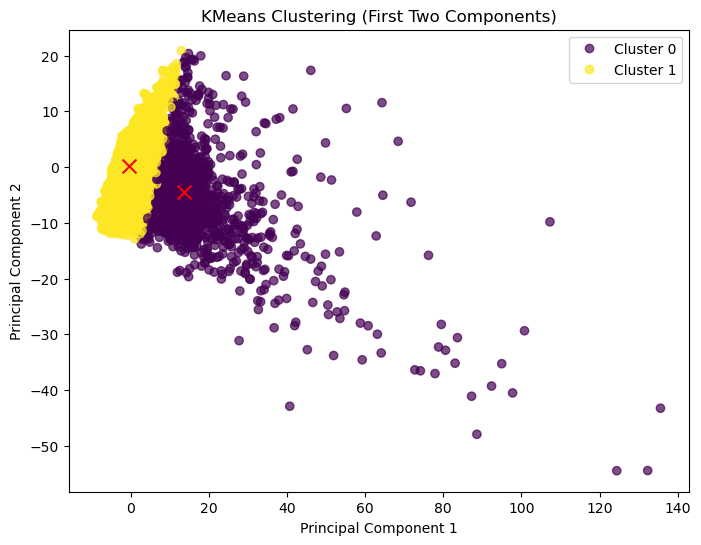

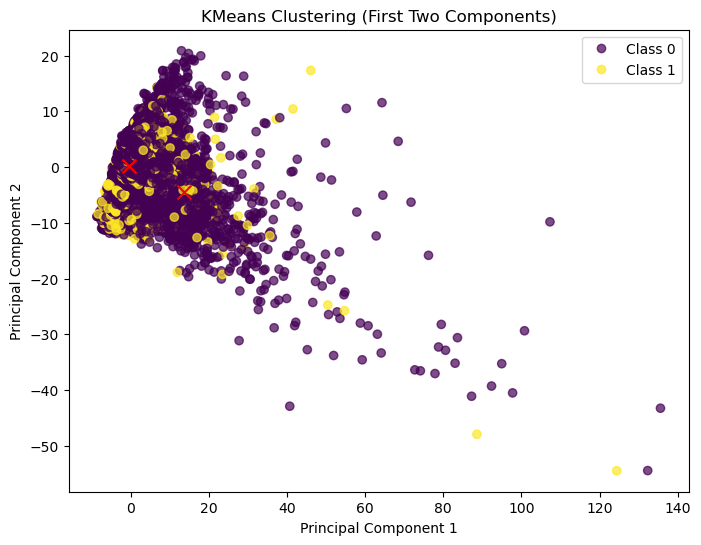

In [ ]:
# visaulize k means clusters in 2d
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering (First Two Components)')
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster 0', 'Cluster 1'])
plt.show()

# labels with y
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.values.flatten(), cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering (First Two Components)')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1'])
plt.show()

DBSCAN
- loss function dtv : time series 

T-test on PCA results

## T-SNE Plots
- Method to map high dim data to a lower dimension for visualization
    - Calc probability distributions in low and high dimensions, minimize divergence between the two
    - KL divergence of P from Q is the expected excess surprise from using Q as a model instead of P when the actual distribution is P.

In [120]:
from sklearn.manifold import TSNE

In [46]:
tsne = TSNE(verbose=1)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 62691 samples in 0.015s...
[t-SNE] Computed neighbors for 62691 samples in 2.620s...
[t-SNE] Computed conditional probabilities for sample 1000 / 62691
[t-SNE] Computed conditional probabilities for sample 2000 / 62691
[t-SNE] Computed conditional probabilities for sample 3000 / 62691
[t-SNE] Computed conditional probabilities for sample 4000 / 62691
[t-SNE] Computed conditional probabilities for sample 5000 / 62691
[t-SNE] Computed conditional probabilities for sample 6000 / 62691
[t-SNE] Computed conditional probabilities for sample 7000 / 62691
[t-SNE] Computed conditional probabilities for sample 8000 / 62691
[t-SNE] Computed conditional probabilities for sample 9000 / 62691
[t-SNE] Computed conditional probabilities for sample 10000 / 62691
[t-SNE] Computed conditional probabilities for sample 11000 / 62691
[t-SNE] Computed conditional probabilities for sample 12000 / 62691
[t-SNE] Computed conditional probabilities for sam

In [47]:
tsne = TSNE(verbose=1)
tsne_results_pruned = tsne.fit_transform(X_pruned)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 62691 samples in 0.012s...
[t-SNE] Computed neighbors for 62691 samples in 1.839s...
[t-SNE] Computed conditional probabilities for sample 1000 / 62691
[t-SNE] Computed conditional probabilities for sample 2000 / 62691
[t-SNE] Computed conditional probabilities for sample 3000 / 62691
[t-SNE] Computed conditional probabilities for sample 4000 / 62691
[t-SNE] Computed conditional probabilities for sample 5000 / 62691
[t-SNE] Computed conditional probabilities for sample 6000 / 62691
[t-SNE] Computed conditional probabilities for sample 7000 / 62691
[t-SNE] Computed conditional probabilities for sample 8000 / 62691
[t-SNE] Computed conditional probabilities for sample 9000 / 62691
[t-SNE] Computed conditional probabilities for sample 10000 / 62691
[t-SNE] Computed conditional probabilities for sample 11000 / 62691
[t-SNE] Computed conditional probabilities for sample 12000 / 62691
[t-SNE] Computed conditional probabilities for sam

In [ ]:
tsne_pca = TSNE(verbose=1)
tsne_results_pca = tsne_pca.fit_transform(X_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 62691 samples in 0.058s...
[t-SNE] Computed neighbors for 62691 samples in 8.506s...
[t-SNE] Computed conditional probabilities for sample 1000 / 62691
[t-SNE] Computed conditional probabilities for sample 2000 / 62691
[t-SNE] Computed conditional probabilities for sample 3000 / 62691
[t-SNE] Computed conditional probabilities for sample 4000 / 62691
[t-SNE] Computed conditional probabilities for sample 5000 / 62691
[t-SNE] Computed conditional probabilities for sample 6000 / 62691
[t-SNE] Computed conditional probabilities for sample 7000 / 62691
[t-SNE] Computed conditional probabilities for sample 8000 / 62691
[t-SNE] Computed conditional probabilities for sample 9000 / 62691
[t-SNE] Computed conditional probabilities for sample 10000 / 62691
[t-SNE] Computed conditional probabilities for sample 11000 / 62691
[t-SNE] Computed conditional probabilities for sample 12000 / 62691
[t-SNE] Computed conditional probabilities for sam

AttributeError: 'TSNE' object has no attribute 'transform'

In [66]:
tsne_results

array([[ 90.112686 ,  28.792835 ],
       [ 82.61301  , -43.093998 ],
       [ 86.24031  ,  10.546634 ],
       ...,
       [  3.6344244, 102.54942  ],
       [ 51.984768 , -19.702475 ],
       [ 47.066776 , -27.0879   ]], dtype=float32)

Save tsne results

In [140]:
folder_path = 'Plots/TSNE'
pd.DataFrame(tsne_results).to_csv(f"{folder_path}/tsne.csv")
pd.DataFrame(tsne_results_pruned).to_csv(f"{folder_path}/tsne_pruned.csv")
pd.DataFrame(tsne_results_pca).to_csv(f"{folder_path}/tsne_pca.csv")

Visualize tsne results

In [ ]:
def plot_tsne(tsne_results,y, type):
    tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
    tsne_df['y'] = y['activity'].values

    plt.figure(figsize=(8,4))
    sns.scatterplot(
        x="tsne1", y="tsne2",
        hue="y",
        # palette=sns.color_palette("hls", 10), 
        palette=['red', 'blue'],
        data=tsne_df,
        legend="full",
        alpha=0.3,
    ).set_title(f"t-SNE Visualization of {type} Dataset")
    
    # save plot to file
    folder_path = 'Plots/TSNE'
    plt.savefig(f"{folder_path}/tsne_{type}.png")

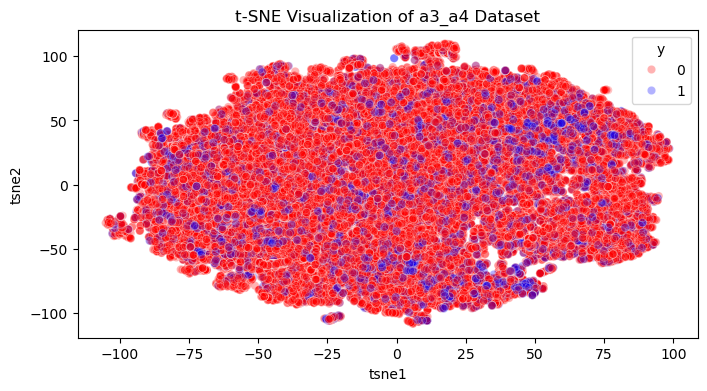

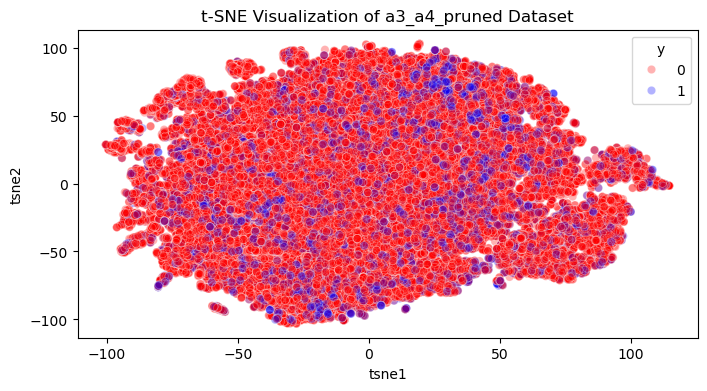

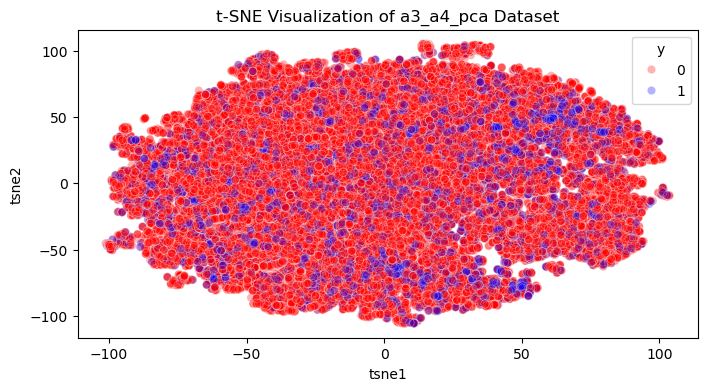

In [117]:
plot_tsne(tsne_results, y, 'a3_a4')
plot_tsne(tsne_results_pruned, y, 'a3_a4_pruned')
plot_tsne(tsne_results_pca, y, 'a3_a4_pca')

TSNE Plots for each subject

fitted for each

In [ ]:
# X_tsne = [tsne.fit_transform(df) for df in X_list_pruned]
X_tsne_pca = [tsne.fit_transform(df) for df in X_list_pca]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1366 samples in 0.001s...
[t-SNE] Computed neighbors for 1366 samples in 0.042s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1366
[t-SNE] Computed conditional probabilities for sample 1366 / 1366
[t-SNE] Mean sigma: 0.517527
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.609970
[t-SNE] KL divergence after 1000 iterations: 0.894899
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1366 samples in 0.000s...
[t-SNE] Computed neighbors for 1366 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1366
[t-SNE] Computed conditional probabilities for sample 1366 / 1366
[t-SNE] Mean sigma: 0.517527
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.624931
[t-SNE] KL divergence after 1000 iterations: 0.894757
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3832 samples in 0.001s...
[t-SNE] Computed neighbors for 3832 samples in 0

Plot each tsne for each partipant

TSNE On raw data

In [ ]:
# for i,t in enumerate(X_tsne):
#     plot_tsne(t, y_list[i], f'partipant n={i} Pruned')

TSNE On pca

In [136]:
# for i,t in enumerate(X_tsne_pca):
#     plot_tsne(t, y_list[i], f'partipant n={i} PCA')